In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import os
import scipy 

In [2]:
df_customer = pd.read_csv(r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Data\Original_Data\customers.csv")
df_customer.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [3]:
df_customer.value_counts(dropna= False)

user_id  First Name  Surnam    Gender  STATE          Age  date_joined  n_dependants  fam_status                        income
1        Linda       Nguyen    Female  Alabama        31   2/17/2019    3             married                           40423     1
137478   Elizabeth   Mcdonald  Female  Maryland       19   12/16/2019   2             living with parents and siblings  28625     1
137468   Todd        Welch     Male    Nevada         31   7/11/2017    1             married                           42533     1
137469   Douglas     Andrews   Male    New Hampshire  45   4/18/2018    1             married                           125718    1
137470   Jeremy      Bennett   Male    New Jersey     19   5/10/2019    3             living with parents and siblings  79969     1
                                                                                                                                 ..
68740    Michael     Wall      Male    Tennessee      48   8/18/2017    3        

In [4]:
# changing the surnam column to surname
df_customer.rename(columns={'Surnam' : 'Surname'}, inplace=True)

# changing the DOB column to date of birth
df_customer.rename(columns={'DOB' : 'Date of Birth'}, inplace=True)

# changing the fam_status column to marital_status
df_customer.rename(columns={'fam_status' : 'marital_status'}, inplace=True)

# changing the n_dependants to number of dependants

df_customer.rename(columns={'n_dependants' : 'number_of_dependants'}, inplace=True)

In [5]:
df_customer.shape

(206209, 10)

In [6]:
df_customer.describe()

,user_id,Age,number_of_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


In [7]:
# total Nan value in the dataframe
df_customer.isna().sum() 

user_id                     0
First Name              11259
Surname                     0
Gender                      0
STATE                       0
Age                         0
date_joined                 0
number_of_dependants        0
marital_status              0
income                      0
dtype: int64

### Nan value have been checked and only the First Name has Nan value, 
### However this is not going to be a problem as we are not going to use the Nan value in the first name which also is not going to affect the analysis.



<AxesSubplot:xlabel='income', ylabel='income'>

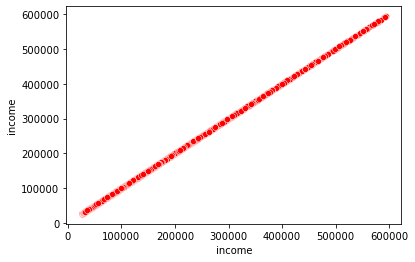

In [8]:
sns.scatterplot(x="income", y="income", data=df_customer, color='red')

### No Outliers Detected

In [9]:
# checking for duplicate value in the dataframe

df_customer.duplicated().sum()

0

### No Duplicates

In [10]:
df_customer.rename(columns={'STATE': 'State'}, inplace=True)

df_customer.head()

,user_id,First Name,Surname,Gender,State,Age,date_joined,number_of_dependants,marital_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [11]:
df_customer.dtypes

user_id                  int64
First Name              object
Surname                 object
Gender                  object
State                   object
Age                      int64
date_joined             object
number_of_dependants     int64
marital_status          object
income                   int64
dtype: object

In [12]:
# changing the data type of date_joined column to datetime
df_customer['date_joined'] = pd.to_datetime(df_customer['date_joined'])

In [13]:
df_customer.dtypes

user_id                          int64
First Name                      object
Surname                         object
Gender                          object
State                           object
Age                              int64
date_joined             datetime64[ns]
number_of_dependants             int64
marital_status                  object
income                           int64
dtype: object

### The data has been cleaned and the data is ready to be used for the analysis.

In [14]:
df_customer.head()

,user_id,First Name,Surname,Gender,State,Age,date_joined,number_of_dependants,marital_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,2017-01-01,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,2017-01-01,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,2017-01-01,1,married,40374


In [15]:
path = r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Data\Prepared_Data"

In [16]:
# exporting the Customer dataframe to a pkl file
df_customer.to_pickle(os.path.join(path, 'df_customer.pkl'))

In [17]:
# import the order_product dataframe 

df_order_product = pd.read_pickle(r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Data\Prepared_Data\order_product_merged2.pkl")

df_order_product.describe()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price,median_days_before_order
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,32404859.0,3.240486e+07,3.240485e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,1.198023e+01,99.0,1.198023e+01,1.039776e+01
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.956554e+02,0.0,8.324227e+01,7.131754e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,99.0,1.000000e+00,0.000000e+00
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,99.0,7.387298e+00,6.000000e+00
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,99.0,7.824786e+00,8.000000e+00
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,99.0,8.254023e+00,1.300000e+01
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,99.0,2.500542e+04,3.000000e+01


In [18]:
df_order_product.head()


,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,average_price,spending_flag,median_days_before_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer


In [19]:
df_order_product.shape


(32404859, 20)

In [20]:
df_order_product.dtypes

order_id                       int64
user_id                        int64
order_number                   int64
order_days_of_week             int64
order_hour_of_day              int64
days_since_prior_order       float64
product_id                     int64
add_to_cart_order              int64
reordered                      int64
product_name                  object
aisle_id                       int64
department_id                  int64
prices                       float64
_merge                      category
max_order                      int64
loyalty_flag                  object
average_price                float64
spending_flag                 object
median_days_before_order     float64
order_frequency_flag          object
dtype: object

In [21]:
# combining the order_product dataframe with the customer dataframe using the user_id

df_order_product_customer = pd.merge(df_order_product, df_customer, on='user_id', how='left')
df_order_product_customer.head()





,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,First Name,Surname,Gender,State,Age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [22]:
df_order_product_customer.shape


(32404859, 29)

In [23]:
df_order_product_customer.isna().sum()


order_id                          0
user_id                           0
order_number                      0
order_days_of_week                0
order_hour_of_day                 0
days_since_prior_order      2076096
product_id                        0
add_to_cart_order                 0
reordered                         0
product_name                      0
aisle_id                          0
department_id                     0
prices                            0
_merge                            0
max_order                         0
loyalty_flag                      0
average_price                     0
spending_flag                     0
median_days_before_order          5
order_frequency_flag              5
First Name                  1775118
Surname                           0
Gender                            0
State                             0
Age                               0
date_joined                       0
number_of_dependants              0
marital_status              

In [24]:
path

'C:\\Users\\okumb\\Downloads\\instaCart_Bucket_04_2024\\Data\\Prepared_Data'

In [25]:
# exporting the order_product_customer dataframe to a pkl file

df_order_product_customer.to_pickle(os.path.join(path, 'df_order_product_customer.pkl'))